<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/ecc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluate ECC

In [ ]:
!pip install eciespy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.6 MB/s eta 0:00:00


In [ ]:
import time
import hashlib
import math
from ecies.utils import generate_eth_key
from ecies import encrypt, decrypt

# Function to calculate the avalanche effect by comparing two hashes
def avalanche_effect(message1, message2):
    hash1 = hashlib.sha256(message1.encode()).hexdigest()
    hash2 = hashlib.sha256(message2.encode()).hexdigest()

    # Compare bit differences
    bit_difference = sum(bin(int(h1, 16) ^ int(h2, 16)).count('1') for h1, h2 in zip(hash1, hash2))
    total_bits = len(hash1) * 4  # Each hex character is 4 bits
    return (bit_difference / total_bits) * 100  # Percentage of differing bits

# Function to evaluate encryption and decryption timing
def evaluate_algorithm(public_key_hex, private_key_hex, content):
    try:
        # Timing the encryption process
        start_time = time.time()
        ciphertext = encrypt(public_key_hex, content.encode())
        encryption_time = time.time() - start_time
        print(f"Ciphertext: {ciphertext.hex()}")
        print(f"Encryption Time: {encryption_time:.6f} seconds")

        # Timing the decryption process
        start_time = time.time()
        decrypted_message = decrypt(private_key_hex, ciphertext)
        decryption_time = time.time() - start_time
        print(f"Decrypted Message: {decrypted_message.decode()}")
        print(f"Decryption Time: {decryption_time:.6f} seconds")

        # Check if the decryption is correct
        if decrypted_message.decode() == content:
            print("Decryption successful: Message matches original content.")
        else:
            print("Decryption failed: Message does not match original content.")

    except Exception as e:
        print(f"Error during encryption/decryption: {e}")

    return ciphertext

# Key Strength Evaluation (Binary Distribution of Key)
def key_strength_analysis(key_hex):
    key_bin = bin(int(key_hex, 16))[2:]  # Convert the key from hex to binary
    bit_count = len(key_bin)

    ones = key_bin.count('1')
    zeros = bit_count - ones

    print(f"Key Strength Analysis:")
    print(f"Total Bits: {bit_count}")
    print(f"1's Count: {ones} ({(ones / bit_count) * 100:.2f}%)")
    print(f"0's Count: {zeros} ({(zeros / bit_count) * 100:.2f}%)\n")

# Entropy Calculation for Ciphertext
def calculate_entropy(data):
    """Calculate Shannon entropy of the data."""
    data_bytes = data
    frequency = {}
    for byte in data_bytes:
        frequency[byte] = frequency.get(byte, 0) + 1

    entropy = 0
    data_length = len(data_bytes)
    for freq in frequency.values():
        probability = freq / data_length
        entropy -= probability * math.log2(probability)

    return entropy

# Use the provided content for encryption
CONTENT = "3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup"

# Generate keys
private_key = generate_eth_key()
public_key = private_key.public_key

public_key_hex = public_key.to_hex()
private_key_hex = private_key.to_hex()

print("Public Key:", public_key_hex)
print("Private Key:", private_key_hex)

# Evaluate algorithm performance and correctness
ciphertext = evaluate_algorithm(public_key_hex, private_key_hex, CONTENT)

# Key Strength Analysis (Binary Distribution of Key)
key_strength_analysis(public_key_hex)

# Testing entropy of ciphertext
ciphertext_entropy = calculate_entropy(ciphertext)
print(f"Entropy of Ciphertext: {ciphertext_entropy:.2f} bits")

# Testing avalanche effect
# Slightly change the content (change one character or bit)
modified_content = "3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup!"
print(f"\nOriginal Message: {CONTENT}")
print(f"Modified Message: {modified_content}")

avalanche_percentage = avalanche_effect(CONTENT, modified_content)
print(f"Avalanche Effect: {avalanche_percentage:.2f}% bit difference between original and modified message")


Public Key: 0x9ff522bff3f7f9772fe7b3af20a8a73d942856d7cf23bf347988828942a95d9eae9a2068c3bdde9402da1aec58eb6cbed8861f5c95f7f8f9dda04bac80322d8f
Private Key: 0x9af5c9cafe52819188693b3f8ecbcb0f1d6f16ed49329cac3d391f46bd37e179
Ciphertext: 04708948c195a58938be99f3f67cd3591b0592316e865c6111c144d56bea695c2e6630072a106e7cd9ea06289c0914524d6963cd119923703f4cf95d6075e1db67bddb61708e1ac99f5d40b4e05d8166ba60c3de836ba2246d8051cb1fdf6e5ea545ac62c7fe5a46813821f9c2b1c24c651202657037ab14fd2f8033976ff6c1afaeb85b5d4e6d588a699889423c42402fca6520bfa226b9ca7224cd2bb694399dad6523560f79dd58c04272eef4b0c7cccd123d28046bd1ee7e9828570dd53ed3133520701f7d0876d9696040a8c508760e698338e7dc0d7c907d0e301942aa468d165e933fecbcf771698352e4b6c1d42a3fea99eeb34e45e7f96d27d3a9b1ad7d69be4a0129153969825b8eb2be82f50e
Encryption Time: 0.000957 seconds
Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wn

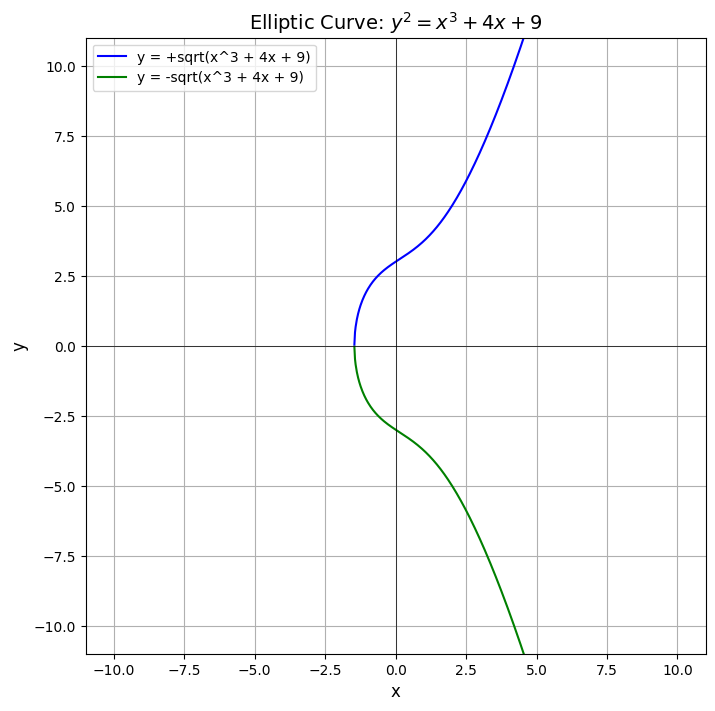

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for the elliptic curve equation y^2 = x^3 + ax + b
a = 4
b = 9

# Function to calculate the right-hand side of the elliptic curve equation
def elliptic_curve(x, a, b):
    return x**3 + a*x + b

# Generate a denser set of x values to make the curve smoother
x = np.linspace(-11, 11, 1000)

# Calculate y^2 values from the elliptic curve equation y^2 = x^3 + ax + b
y_squared = elliptic_curve(x, a, b)

# Mask values where y^2 is negative, as sqrt can't be applied to negative numbers in real numbers
valid_mask = y_squared >= 0
y_squared_valid = y_squared[valid_mask]
x_valid = x[valid_mask]

# Calculate y values (positive and negative branches) from valid y^2 values
y_positive = np.sqrt(y_squared_valid)
y_negative = -np.sqrt(y_squared_valid)

# Plot the elliptic curve
plt.figure(figsize=(8, 8))
plt.plot(x_valid, y_positive, label="y = +sqrt(x^3 + 4x + 9)", color='blue')
plt.plot(x_valid, y_negative, label="y = -sqrt(x^3 + 4x + 9)", color='green')

# Add labels, title, and legend
plt.title(r'Elliptic Curve: $y^2 = x^3 + 4x + 9$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Add grid and set limits for better visualization of the negative x-axis
plt.grid(True)
plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.legend()

# Show the plot
plt.show()